## Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from scipy.stats import zscore

## Get the data

In [2]:
df = pd.read_csv("../../../datasets/parte2/teste/dataset.csv")
dfRadiation = pd.read_csv("../../../datasets/parte2/teste/radiation.csv")

#### Rename some columns

In [3]:
dfRadiation.rename(columns={'Data': 'date','Hora':'hour'}, inplace=True)

#### Merge Datasets

In [4]:
df = pd.merge(df, dfRadiation, on=['date','hour'], how='inner')

## Feature engineering

#### Split date

In [5]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d", utc=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop(['date'], inplace=True, axis=1)


df.head()

,dt,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,...,terrestrial_radiation_y,shortwave_radiation_instant_y,direct_radiation_instant_y,diffuse_radiation_instant_y,direct_normal_irradiance_instant_y,terrestrial_radiation_instant_y,shortwave_radiation_sum,year,month,day
0,1672531200,local,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.45,2023,1,1
1,1672534800,local,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.45,2023,1,1
2,1672538400,local,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.45,2023,1,1
3,1672542000,local,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.45,2023,1,1
4,1672545600,local,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.45,2023,1,1


#### Remove city_name

In [6]:
df.drop('city_name', axis=1, inplace=True)

df.head()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,...,terrestrial_radiation_y,shortwave_radiation_instant_y,direct_radiation_instant_y,diffuse_radiation_instant_y,direct_normal_irradiance_instant_y,terrestrial_radiation_instant_y,shortwave_radiation_sum,year,month,day
0,1672531200,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.45,2023,1,1
1,1672534800,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.45,2023,1,1
2,1672538400,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.45,2023,1,1
3,1672542000,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.45,2023,1,1
4,1672545600,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.45,2023,1,1


#### Remove day, month, year and hour

In [7]:
df.drop('day', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)

df.head()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,...,diffuse_radiation_y,direct_normal_irradiance_y,terrestrial_radiation_y,shortwave_radiation_instant_y,direct_radiation_instant_y,diffuse_radiation_instant_y,direct_normal_irradiance_instant_y,terrestrial_radiation_instant_y,shortwave_radiation_sum,month
0,1672531200,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45,1
1,1672534800,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45,1
2,1672538400,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45,1
3,1672542000,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45,1
4,1672545600,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45,1


#### Remove dt

In [8]:
df.drop('dt', axis=1, inplace=True)

df.head()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,...,diffuse_radiation_y,direct_normal_irradiance_y,terrestrial_radiation_y,shortwave_radiation_instant_y,direct_radiation_instant_y,diffuse_radiation_instant_y,direct_normal_irradiance_instant_y,terrestrial_radiation_instant_y,shortwave_radiation_sum,month
0,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,3.72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45,1
1,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,3.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45,1
2,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,2.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45,1
3,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,1.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45,1
4,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,1.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45,1


## Label binarizer

In [9]:
df['weather_description'] = df['weather_description'].replace('clear sky', 'sky is clear')

In [10]:
lb = LabelBinarizer()

lb_results = lb.fit_transform(df['weather_description'])

lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

df = pd.concat([df, lb_results_df], axis=1)

df.drop('weather_description', axis=1, inplace=True)

In [11]:
df.head()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,...,shortwave_radiation_sum,month,broken clouds,few clouds,heavy intensity rain,light rain,moderate rain,overcast clouds,scattered clouds,sky is clear
0,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,3.72,...,0.45,1,0,0,0,0,1,0,0,0
1,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,3.26,...,0.45,1,0,0,0,0,1,0,0,0
2,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,2.44,...,0.45,1,0,0,0,0,1,0,0,0
3,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,1.74,...,0.45,1,0,0,0,0,1,0,0,0
4,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,1.13,...,0.45,1,0,0,0,0,1,0,0,0


## Missing Values

#### Remove sea_level, grnd_level and rain_1h

In [12]:
df.drop('sea_level', axis=1, inplace=True)
df.drop('grnd_level', axis=1, inplace=True)
df.drop('rain_1h', axis=1, inplace=True) # experimentar a media

In [13]:
print(df.isna().sum())

temp                                  0
feels_like                            0
temp_min                              0
temp_max                              0
pressure                              0
humidity                              0
wind_speed                            0
clouds_all                            0
hour                                  0
normal                                0
economic_schedule                     0
self-consumption                      0
shortwave_radiation_x                 0
direct_radiation_x                    0
diffuse_radiation_x                   0
direct_normal_irradiance_x            0
terrestrial_radiation_x               0
shortwave_radiation_instant_x         0
direct_radiation_instant_x            0
diffuse_radiation_instant_x           0
direct_normal_irradiance_instant_x    0
terrestrial_radiation_instant_x       0
sunshine_duration                     0
shortwave_radiation_y                 0
direct_radiation_y                    0


In [14]:
df.head()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,hour,normal,...,shortwave_radiation_sum,month,broken clouds,few clouds,heavy intensity rain,light rain,moderate rain,overcast clouds,scattered clouds,sky is clear
0,12.93,12.76,12.72,13.43,1019,95,2.02,100,0,0.0,...,0.45,1,0,0,0,0,1,0,0,0
1,13.49,13.38,13.43,13.90,1018,95,2.18,100,1,0.0,...,0.45,1,0,0,0,0,1,0,0,0
2,13.55,13.44,13.48,14.82,1017,95,2.88,100,2,0.0,...,0.45,1,0,0,0,0,1,0,0,0
3,13.61,13.51,12.01,14.82,1016,95,3.63,100,3,0.0,...,0.45,1,0,0,0,0,1,0,0,0
4,13.59,13.49,12.01,14.82,1015,95,4.58,100,4,0.0,...,0.45,1,0,0,0,0,1,0,0,0


#### Types normalization

In [15]:
df.dtypes

temp                                  float64
feels_like                            float64
temp_min                              float64
temp_max                              float64
pressure                                int64
humidity                                int64
wind_speed                            float64
clouds_all                              int64
hour                                    int64
normal                                float64
economic_schedule                     float64
self-consumption                      float64
shortwave_radiation_x                 float64
direct_radiation_x                    float64
diffuse_radiation_x                   float64
direct_normal_irradiance_x            float64
terrestrial_radiation_x               float64
shortwave_radiation_instant_x         float64
direct_radiation_instant_x            float64
diffuse_radiation_instant_x           float64
direct_normal_irradiance_instant_x    float64
terrestrial_radiation_instant_x   

In [16]:
df['temp'] = (df['temp'] - df['temp'].min()) / (df['temp'].max() - df['temp'].min())

df['feels_like'] = (df['feels_like'] - df['feels_like'].min()) / (df['feels_like'].max() - df['feels_like'].min())

df['temp_min'] = (df['temp_min'] - df['temp_min'].min()) / (df['temp_min'].max() - df['temp_min'].min())

df['temp_max'] = (df['temp_max'] - df['temp_max'].min()) / (df['temp_max'].max() - df['temp_max'].min())

df['pressure'] = (df['pressure'] - df['pressure'].min()) / (df['pressure'].max() - df['pressure'].min())

df['humidity'] = (df['humidity'] - df['humidity'].min()) / (df['humidity'].max() - df['humidity'].min())

df['wind_speed'] = (df['wind_speed'] - df['wind_speed'].min()) / (df['wind_speed'].max() - df['wind_speed'].min())

df['clouds_all'] = (df['clouds_all'] - df['clouds_all'].min()) / (df['clouds_all'].max() - df['clouds_all'].min())

df['hour'] = (df['hour'] - df['hour'].min()) / (df['hour'].max() - df['hour'].min())

df['normal'] = (df['normal'] - df['normal'].min()) / (df['normal'].max() - df['normal'].min())

df['economic_schedule'] = (df['economic_schedule'] - df['economic_schedule'].min()) / (df['economic_schedule'].max() - df['economic_schedule'].min())

df['self-consumption'] = (df['self-consumption'] - df['self-consumption'].min()) / (df['self-consumption'].max() - df['self-consumption'].min())

df['month'] = (df['month'] - df['month'].min()) / (df['month'].max() - df['month'].min())

df['broken clouds'] = (df['broken clouds'] - df['broken clouds'].min()) / (df['broken clouds'].max() - df['broken clouds'].min())

df['few clouds'] = (df['few clouds'] - df['few clouds'].min()) / (df['few clouds'].max() - df['few clouds'].min())

df['heavy intensity rain'] = (df['heavy intensity rain'] - df['heavy intensity rain'].min()) / (df['heavy intensity rain'].max() - df['heavy intensity rain'].min())

df['light rain'] = (df['light rain'] - df['light rain'].min()) / (df['light rain'].max() - df['light rain'].min())

df['moderate rain'] = (df['moderate rain'] - df['moderate rain'].min()) / (df['moderate rain'].max() - df['moderate rain'].min())

df['overcast clouds'] = (df['overcast clouds'] - df['overcast clouds'].min()) / (df['overcast clouds'].max() - df['overcast clouds'].min())

df['scattered clouds'] = (df['scattered clouds'] - df['scattered clouds'].min()) / (df['scattered clouds'].max() - df['scattered clouds'].min())

df['sky is clear'] = (df['sky is clear'] - df['sky is clear'].min()) / (df['sky is clear'].max() - df['sky is clear'].min())

"""
df['shortwave_radiation_sum'] = (df['shortwave_radiation_sum'] - df['shortwave_radiation_sum'].min()) / (df['shortwave_radiation_sum'].max() - df['shortwave_radiation_sum'].min())
df['shortwave_radiation'] = (df['shortwave_radiation'] - df['shortwave_radiation'].min()) / (df['shortwave_radiation'].max() - df['shortwave_radiation'].min())
df['direct_radiation'] = (df['direct_radiation'] - df['direct_radiation'].min()) / (df['direct_radiation'].max() - df['direct_radiation'].min())
df['diffuse_radiation'] = (df['diffuse_radiation'] - df['diffuse_radiation'].min()) / (df['diffuse_radiation'].max() - df['diffuse_radiation'].min())
df['direct_normal_irradiance'] = (df['direct_normal_irradiance'] - df['direct_normal_irradiance'].min()) / (df['direct_normal_irradiance'].max() - df['direct_normal_irradiance'].min())
df['terrestrial_radiation'] = (df['terrestrial_radiation'] - df['terrestrial_radiation'].min()) / (df['terrestrial_radiation'].max() - df['terrestrial_radiation'].min())
df['shortwave_radiation_instant'] = (df['shortwave_radiation_instant'] - df['shortwave_radiation_instant'].min()) / (df['shortwave_radiation_instant'].max() - df['shortwave_radiation_instant'].min())
df['direct_radiation_instant'] = (df['direct_radiation_instant'] - df['direct_radiation_instant'].min()) / (df['direct_radiation_instant'].max() - df['direct_radiation_instant'].min())
df['diffuse_radiation_instant'] = (df['diffuse_radiation_instant'] - df['diffuse_radiation_instant'].min()) / (df['diffuse_radiation_instant'].max() - df['diffuse_radiation_instant'].min())
df['direct_normal_irradiance_instant'] = (df['direct_normal_irradiance_instant'] - df['direct_normal_irradiance_instant'].min()) / (df['direct_normal_irradiance_instant'].max() - df['direct_normal_irradiance_instant'].min())
df['terrestrial_radiation_instant'] = (df['terrestrial_radiation_instant'] - df['terrestrial_radiation_instant'].min()) / (df['terrestrial_radiation_instant'].max() - df['terrestrial_radiation_instant'].min())
"""

"\ndf['shortwave_radiation_sum'] = (df['shortwave_radiation_sum'] - df['shortwave_radiation_sum'].min()) / (df['shortwave_radiation_sum'].max() - df['shortwave_radiation_sum'].min())\ndf['shortwave_radiation'] = (df['shortwave_radiation'] - df['shortwave_radiation'].min()) / (df['shortwave_radiation'].max() - df['shortwave_radiation'].min())\ndf['direct_radiation'] = (df['direct_radiation'] - df['direct_radiation'].min()) / (df['direct_radiation'].max() - df['direct_radiation'].min())\ndf['diffuse_radiation'] = (df['diffuse_radiation'] - df['diffuse_radiation'].min()) / (df['diffuse_radiation'].max() - df['diffuse_radiation'].min())\ndf['direct_normal_irradiance'] = (df['direct_normal_irradiance'] - df['direct_normal_irradiance'].min()) / (df['direct_normal_irradiance'].max() - df['direct_normal_irradiance'].min())\ndf['terrestrial_radiation'] = (df['terrestrial_radiation'] - df['terrestrial_radiation'].min()) / (df['terrestrial_radiation'].max() - df['terrestrial_radiation'].min())\nd

In [17]:
df.to_csv('../../../datasets/parte2/teste/dataset_prepared.csv', index=False)

<Axes: >

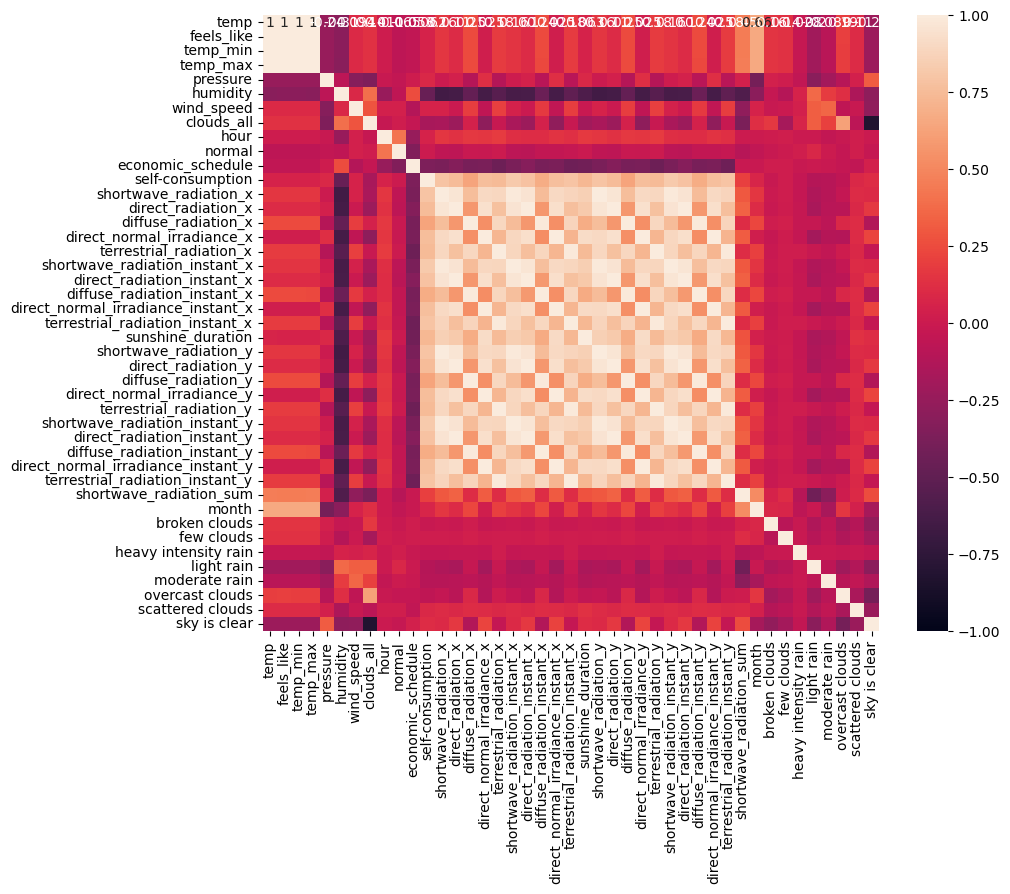

In [18]:
corr_matrix = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

In [19]:
#print(corr_matrix['injection'])